In [1]:
import numpy as np
import h5py
import pickle
import sys
import os
import matplotlib.pyplot as plt

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

import src.models as models 

In [2]:

with h5py.File("scaling_training_regressorV2.h5", "r") as f:
    
    seed_vec_base = f['results/seed'][:]
    hidden_vec_base = f['results/ratio'][:]
    loss_net_vec_base = f['results/loss_net'][:]
    loss_proj_vec_base = f['results/loss_proj'][:]
    pickled_config_base = f['results/config'][()]
    constant_net = f['results/const_net'][:]
    constant_proj = f['results/const_proj'][:]

config = pickle.loads(pickled_config_base)


unique_hidden_base = np.unique(hidden_vec_base)
loss_net_base_dict = {ele: [] for ele in unique_hidden_base}
loss_proj_base_dict = {ele: [] for ele in unique_hidden_base}

const_net_base_dict = {ele: [] for ele in unique_hidden_base}
const_proj_base_dict = {ele: [] for ele in unique_hidden_base}


for i in range(len(seed_vec_base)):
    
    loss_net_base_dict[hidden_vec_base[i]].append(loss_net_vec_base[i])
    loss_proj_base_dict[hidden_vec_base[i]].append(loss_proj_vec_base[i])
    
    const_net_base_dict[hidden_vec_base[i]].append(constant_net[i])
    const_proj_base_dict[hidden_vec_base[i]].append(constant_proj[i])


rmse_net_base_dict = {}
for i, (size, vec) in enumerate(loss_net_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_net_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse_const_base_dict = {}
for i, (size, vec) in enumerate(const_net_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_const_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


rmse_proj_base_dict = {}
for i, (size, vec) in enumerate(loss_proj_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_proj_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


rmse_const_proj_base_dict = {}
for i, (size, vec) in enumerate(const_proj_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_const_proj_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    

In [3]:
print(rmse_const_proj_base_dict)
print(rmse_const_base_dict)

{np.float64(0.15): (np.float64(8.605269220630553e-12), np.float64(2.0602658040905152e-12)), np.float64(0.3): (np.float64(8.037888220199818e-12), np.float64(2.0153245611091303e-12)), np.float64(0.45): (np.float64(8.697825781588538e-12), np.float64(6.908124986506491e-13)), np.float64(0.6): (np.float64(8.507378258452603e-12), np.float64(1.125409364446702e-12)), np.float64(0.75): (np.float64(7.555200649015275e-12), np.float64(5.304163645013565e-13))}
{np.float64(0.15): (np.float64(0.04197836478632649), np.float64(0.008602331830634179)), np.float64(0.3): (np.float64(0.03762310465154982), np.float64(0.010970826999393323)), np.float64(0.45): (np.float64(0.039448896267955155), np.float64(0.004493062177091566)), np.float64(0.6): (np.float64(0.045053017061656264), np.float64(0.00609880876634633)), np.float64(0.75): (np.float64(0.05558894989808886), np.float64(0.007650303560012853))}


In [4]:

with h5py.File("scaling_training_pcdae_sine_V3.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    hidden_vec_pcdae = f['results/ratio'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine1_pcdae = f['results/loss_T1'][:]
    loss_refine2_pcdae = f['results/loss_T2'][:]
    const_refine1_pcdae = f['results/constant_T'][:]
    const_refine2_pcdae = f['results/constant_Tadapt'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(hidden_vec_pcdae)
loss1_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
loss2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}

const1_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
const2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss1_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine1_pcdae[i])
    loss2_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine2_pcdae[i])
    
    const1_pcdae_dict[hidden_vec_pcdae[i]].append(const_refine1_pcdae[i])
    const2_pcdae_dict[hidden_vec_pcdae[i]].append(const_refine2_pcdae[i])


rmse1_pcdae_dict = {}
for i, (size, vec) in enumerate(loss1_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse1_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse2_pcdae_dict = {}
for i, (size, vec) in enumerate(loss2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


rmse1_const_pcdae_dict = {}
for i, (size, vec) in enumerate(const1_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse1_const_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse2_const_pcdae_dict = {}
for i, (size, vec) in enumerate(const2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse2_const_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    


In [5]:
print(rmse2_const_pcdae_dict)
print(rmse1_const_pcdae_dict)

{np.float64(0.15): (np.float32(0.024039937), np.float32(0.0054798233)), np.float64(0.3): (np.float32(0.03722706), np.float32(0.031785727)), np.float64(0.45): (np.float32(0.022498423), np.float32(0.004606255)), np.float64(0.6): (np.float32(0.02250638), np.float32(0.006545335)), np.float64(0.75): (np.float32(0.02994234), np.float32(0.00614525))}
{np.float64(0.15): (np.float32(0.024039991), np.float32(0.0054799346)), np.float64(0.3): (np.float32(0.03722692), np.float32(0.03178554)), np.float64(0.45): (np.float32(0.022498094), np.float32(0.004606083)), np.float64(0.6): (np.float32(0.02250612), np.float32(0.0065442426)), np.float64(0.75): (np.float32(0.029942185), np.float32(0.0061452016))}


In [6]:
print(rmse1_pcdae_dict)
print(rmse2_pcdae_dict)
print(const1_pcdae_dict)
print(const2_pcdae_dict)

{np.float64(0.15): (np.float64(0.03209503615158658), np.float64(0.015216601221156265)), np.float64(0.3): (np.float64(0.047079033938929434), np.float64(0.04630307363836495)), np.float64(0.45): (np.float64(0.044358588457725556), np.float64(0.0243527615551394)), np.float64(0.6): (np.float64(0.0422356549073981), np.float64(0.01941082107602354)), np.float64(0.75): (np.float64(0.06643075183042874), np.float64(0.016304153887725905))}
{np.float64(0.15): (np.float64(0.03209609342613555), np.float64(0.015218200661220942)), np.float64(0.3): (np.float64(0.047079206001865145), np.float64(0.046303204767361196)), np.float64(0.45): (np.float64(0.04435877999406052), np.float64(0.02435322240202571)), np.float64(0.6): (np.float64(0.042236098645333675), np.float64(0.019410520326501313)), np.float64(0.75): (np.float64(0.06643165880765318), np.float64(0.016303088091917734))}
{np.float64(0.15): [np.float32(0.00040463125), np.float32(0.0007834363), np.float32(0.0014133452), np.float32(0.0004704797), np.float3

In [7]:
with h5py.File("scaling_training_ebm_pcdae_sine_V3.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    hidden_vec_pcdae = f['results/ratio'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine_ebm_pcdae = f['results/loss_T'][:]
    loss_refine2_ebm_pcdae = f['results/loss_Tadapt'][:]
    const_refine_ebm_pcdae = f['results/constant_T'][:]
    const_refine2_ebm_pcdae = f['results/constant_Tadapt'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(hidden_vec_pcdae)
loss_ebm_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
loss_ebm2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
const_ebm_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
const_ebm2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss_ebm_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine_ebm_pcdae[i])
    loss_ebm2_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine2_ebm_pcdae[i])
    const_ebm_pcdae_dict[hidden_vec_pcdae[i]].append(const_refine_ebm_pcdae[i])
    const_ebm2_pcdae_dict[hidden_vec_pcdae[i]].append(const_refine2_ebm_pcdae[i])


rmse_ebm_pcdae_dict = {}
for i, (size, vec) in enumerate(loss_ebm_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_ebm_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


rmse_const_ebm_pcdae_dict = {}
for i, (size, vec) in enumerate(const_ebm_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_const_ebm_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    

rmse_ebm2_pcdae_dict = {}
for i, (size, vec) in enumerate(loss_ebm2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_ebm2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


rmse_const_ebm2_pcdae_dict = {}
for i, (size, vec) in enumerate(const_ebm2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_const_ebm2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


In [8]:

# print(rmse1_pcdae_dict)
print(rmse_ebm_pcdae_dict)
print(rmse_ebm2_pcdae_dict)
print(rmse_const_ebm_pcdae_dict)
print(rmse_const_ebm2_pcdae_dict)

{np.float64(0.15): (np.float64(0.03147422119445789), np.float64(0.012519922303331082)), np.float64(0.3): (np.float64(0.04436214826295292), np.float64(0.03285150117148657)), np.float64(0.45): (np.float64(0.04484114554278842), np.float64(0.023734171106157307)), np.float64(0.6): (np.float64(0.048841319962140695), np.float64(0.022468010990564273)), np.float64(0.75): (np.float64(0.07035173953733123), np.float64(0.012925989482073748))}
{np.float64(0.15): (np.float64(0.03151372833203713), np.float64(0.012465881726019553)), np.float64(0.3): (np.float64(0.044211733137432416), np.float64(0.032737167410733736)), np.float64(0.45): (np.float64(0.04502986747218342), np.float64(0.023701975632664744)), np.float64(0.6): (np.float64(0.04897314244377977), np.float64(0.02243714659544791)), np.float64(0.75): (np.float64(0.07310447769805978), np.float64(0.014374979264794575))}
{np.float64(0.15): (np.float32(0.022898715), np.float32(0.007203897)), np.float64(0.3): (np.float32(0.038904764), np.float32(0.02439

In [9]:
# {25: (0.03892328244711214, 0.012761811057688288), 35: (0.03209940911568902, 0.011635751777223721), 47: (0.030230900676482424, 0.011297122537077372), 58: (0.03237109134331768, 0.014711895105571646), 68: (0.033561320069798714, 0.015360580491637054), 85: (0.03432773354508564, 0.016583365783693158)}
# {25: (0.03645028776376201, 0.015570964785782074), 35: (0.029720995114591486, 0.010124212226252895), 47: (0.032365060774387444, 0.014800318191074057), 58: (0.030925890463342053, 0.01381257177405546), 68: (0.03538006023759406, 0.01840676841551432), 85: (0.033029740666300315, 0.014671696845790286)}

In [10]:
### parameters count regressor

input_size = 3
output_size = 17

parameters_base = []
rmse_net_mean_base = []
rmse_net_std_base = []
rmse_proj_mean_base = []
rmse_proj_std_base = []

const_net_base = []
const_proj_base = []

for idx, (ele, val) in enumerate(rmse_proj_base_dict.items()):
    
    if idx == 2:
        continue
    
    parameters_base.append(1-ele)
    mean, std = rmse_net_base_dict[ele]
    rmse_net_mean_base.append(mean)
    rmse_net_std_base.append(std)
    
    mean, std = rmse_proj_base_dict[ele]
    rmse_proj_mean_base.append(mean)
    rmse_proj_std_base.append(std)
    
    mean, _ = rmse_const_base_dict[ele]
    const_net_base.append(mean)
    
    mean, _ = rmse_const_proj_base_dict[ele]
    const_proj_base.append(mean)
    

rmse_net_mean_base = np.array(rmse_net_mean_base)
rmse_net_std_base = np.array(rmse_net_std_base)

const_net_base = np.array(const_net_base)

rmse_proj_mean_base = np.array(rmse_proj_mean_base)
rmse_proj_std_base = np.array(rmse_proj_std_base)

const_proj_base = np.array(const_proj_base)

input_size = 3
output_size = 17


parameters_pcdae = []
rmse1_mean_pcdae = []
rmse1_std_pcdae = []
rmse2_mean_pcdae = []
rmse2_std_pcdae = []

const_pcdae1 = []
const_pcdae2 = []

rmse1_mean_ebm_pcdae = []
rmse1_std_ebm_pcdae = []
rmse2_mean_ebm_pcdae = []
rmse2_std_ebm_pcdae = []

const_ebm1 = []
const_ebm2 = []


for idx, (ele, val) in enumerate(rmse_proj_base_dict.items()):


    parameters_pcdae.append(1-ele)
    mean, std = rmse1_pcdae_dict[ele]
    rmse1_mean_pcdae.append(mean)
    rmse1_std_pcdae.append(std)
    
    mean, std = rmse2_pcdae_dict[ele]
    rmse2_mean_pcdae.append(mean)
    rmse2_std_pcdae.append(std)
    
    mean, _ = rmse1_const_pcdae_dict[ele]
    const_pcdae1.append(mean)
    
    mean, _ = rmse2_const_pcdae_dict[ele]
    const_pcdae2.append(mean)
    
    mean, std = rmse_ebm_pcdae_dict[ele]
    rmse1_mean_ebm_pcdae.append(mean)
    rmse1_std_ebm_pcdae.append(std)
    
    mean, std = rmse_ebm2_pcdae_dict[ele]
    rmse2_mean_ebm_pcdae.append(mean)
    rmse2_std_ebm_pcdae.append(std)
    
    mean, _ = rmse_const_ebm_pcdae_dict[ele]
    const_ebm1.append(mean)
    
    mean, _ = rmse_const_ebm2_pcdae_dict[ele]
    const_ebm2.append(mean)


rmse1_mean_pcdae = np.array(rmse1_mean_pcdae)
rmse2_mean_pcdae = np.array(rmse2_mean_pcdae)

rmse1_std_pcdae = np.array(rmse1_std_pcdae)
rmse2_std_pcdae = np.array(rmse2_std_pcdae)

rmse1_mean_ebm_pcdae = np.array(rmse1_mean_ebm_pcdae)
rmse1_std_ebm_pcdae = np.array(rmse1_std_ebm_pcdae)

rmse2_mean_ebm_pcdae = np.array(rmse2_mean_ebm_pcdae)
rmse2_std_ebm_pcdae = np.array(rmse2_std_ebm_pcdae)

const_ebm1 = np.array(const_ebm1)
const_ebm2 = np.array(const_ebm2)

const_pcdae1 = np.array(const_pcdae1)
const_pcdae2 = np.array(const_pcdae2)


In [11]:
# print(const_ebm_pcdae_dict[25])

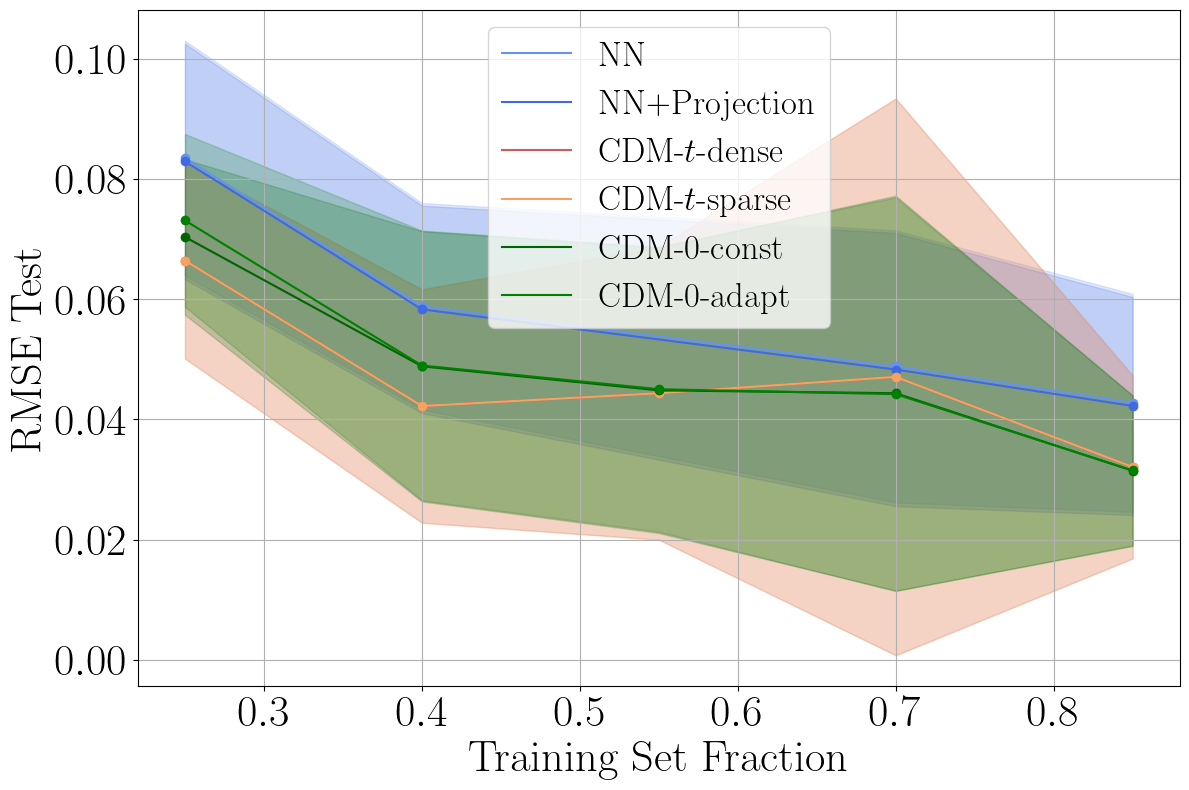

In [15]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

NN_color = "cornflowerblue"
NN_Proj_color = "royalblue"

EBM1_color = "darkgreen"
EBM2_color = "mediumseagreen"

CDM1_color = "indianred"
CDM2_color = "sandybrown"

plt.plot(parameters_base, rmse_net_mean_base, label="NN", color=NN_color)
plt.plot(parameters_base, rmse_net_mean_base, 'o', color=NN_color)
plt.fill_between(parameters_base,
                    rmse_net_mean_base - rmse_net_std_base,
                    rmse_net_mean_base + rmse_net_std_base,
                    alpha=0.2, color=NN_color)


plt.plot(parameters_base, rmse_proj_mean_base, label="NN+Projection", color=NN_Proj_color)
plt.plot(parameters_base, rmse_proj_mean_base, 'o', color=NN_Proj_color)
plt.fill_between(parameters_base,
                    rmse_proj_mean_base - rmse_proj_std_base,
                    rmse_proj_mean_base + rmse_proj_std_base,
                    alpha=0.2, color=NN_Proj_color)


plt.plot(parameters_pcdae, rmse1_mean_pcdae, label=r"CDM-$t$-dense", color=CDM1_color)
plt.plot(parameters_pcdae, rmse1_mean_pcdae, 'o', color=CDM1_color)
plt.fill_between(parameters_pcdae,
                    rmse1_mean_pcdae - rmse1_std_pcdae,
                    rmse1_mean_pcdae + rmse1_std_pcdae,
                    alpha=0.2, color=CDM1_color)

plt.plot(parameters_pcdae, rmse1_mean_pcdae, label=r"CDM-$t$-sparse", color=CDM2_color)
plt.plot(parameters_pcdae, rmse1_mean_pcdae, 'o', color=CDM2_color)
plt.fill_between(parameters_pcdae,
                    rmse1_mean_pcdae - rmse1_std_pcdae,
                    rmse1_mean_pcdae + rmse1_std_pcdae,
                    alpha=0.2, color=CDM2_color)


plt.plot(parameters_pcdae, rmse1_mean_ebm_pcdae, label="CDM-$0$-const", color=EBM1_color)
plt.plot(parameters_pcdae, rmse1_mean_ebm_pcdae, 'o', color=EBM1_color)
plt.fill_between(parameters_pcdae,
                    rmse1_mean_ebm_pcdae - rmse1_std_ebm_pcdae,
                    rmse1_mean_ebm_pcdae + rmse1_std_ebm_pcdae,
                    alpha=0.2, color=EBM1_color)

plt.plot(parameters_pcdae, rmse2_mean_ebm_pcdae, label="CDM-$0$-adapt", color="green")
plt.plot(parameters_pcdae, rmse2_mean_ebm_pcdae, 'o', color="green")
plt.fill_between(parameters_pcdae,
                    rmse2_mean_ebm_pcdae - rmse2_std_ebm_pcdae,
                    rmse2_mean_ebm_pcdae + rmse2_std_ebm_pcdae,
                    alpha=0.2, color="green")


plt.xlabel(r'Training Set Fraction', fontsize=32)
plt.ylabel(r'RMSE Test', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=25)
plt.tight_layout()
plt.grid()
plt.savefig("scaling_training_V3.png")

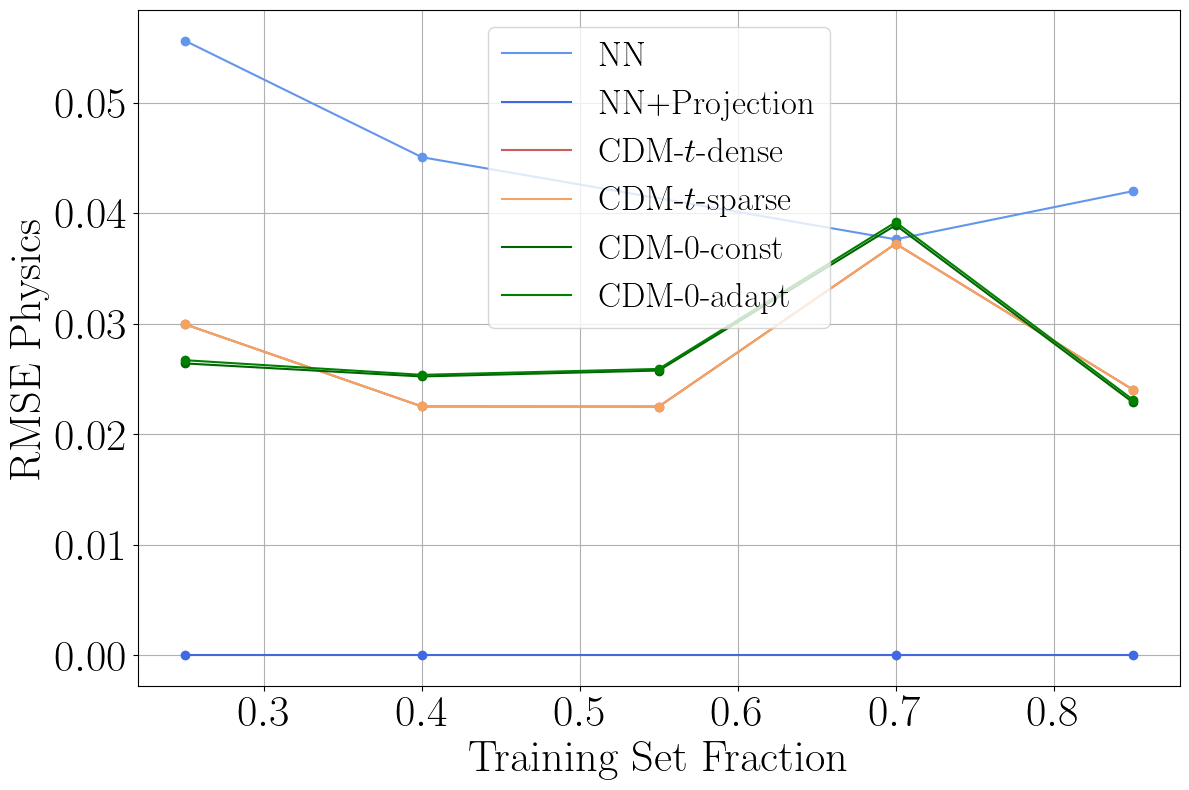

In [14]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

NN_color = "cornflowerblue"
NN_Proj_color = "royalblue"

EBM1_color = "darkgreen"
EBM2_color = "mediumseagreen"

CDM1_color = "indianred"
CDM2_color = "sandybrown"

plt.plot(parameters_base, const_net_base, label="NN", color=NN_color)
plt.plot(parameters_base, const_net_base, 'o', color=NN_color)


plt.plot(parameters_base, const_proj_base, label="NN+Projection", color=NN_Proj_color)
plt.plot(parameters_base, const_proj_base, 'o', color=NN_Proj_color)



plt.plot(parameters_pcdae, const_pcdae1, label=r"CDM-$t$-dense", color=CDM1_color)
plt.plot(parameters_pcdae, const_pcdae1, 'o', color=CDM1_color)


plt.plot(parameters_pcdae, const_pcdae2, label=r"CDM-$t$-sparse", color=CDM2_color)
plt.plot(parameters_pcdae, const_pcdae2, 'o', color=CDM2_color)



plt.plot(parameters_pcdae, const_ebm1, label="CDM-$0$-const", color=EBM1_color)
plt.plot(parameters_pcdae, const_ebm1, 'o', color=EBM1_color)


plt.plot(parameters_pcdae, const_ebm2, label="CDM-$0$-adapt", color="green")
plt.plot(parameters_pcdae, const_ebm2, 'o', color="green")



plt.xlabel(r'Training Set Fraction', fontsize=32)
plt.ylabel(r'RMSE Physics', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=25)
plt.tight_layout()
plt.grid()
plt.savefig("const_scaling_training_V3.png")